In [1]:
import numpy as np
import pandas as pd
import csv
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

<img src="./images/FindingFormFactor.png",width=500,height=500>

In [3]:
# Import csv (csv files containing the coordinates of the subsurfaces of the two main surfaces)

filename = 'Radiator_Low_Res.csv'
#filename = 'Radiator_Mid_Res.csv'
#filename = 'Radiator_High_Res.csv'
with open(filename, 'rU') as p:
        my_list = [[float(x) for x in rec] for rec in csv.reader(p, delimiter=',')]
lol = lambda lst, sz: [lst[i:i+sz] for i in range(0, len(lst), sz)]
subsurfaces1 = []
for i in range(0,len(my_list)):
    subsurfaces1.append(lol(my_list[i],3))

filename = 'Body_Low_Res.csv'
#filename = 'Body_Mid_Res.csv'
#filename = 'Body_High_Res.csv'
with open(filename, 'rU') as p:
        my_list = [[float(x) for x in rec] for rec in csv.reader(p, delimiter=',')]
subsurfaces2 = []
for i in range(0,len(my_list)):
    subsurfaces2.append(lol(my_list[i],3))

C:\Users\Bharath\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 'U' mode is deprecated
  
C:\Users\Bharath\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 'U' mode is deprecated
  app.launch_new_instance()


In [32]:
x = []; x1 = [] 
y =[]; y1 = [] 
z = []; z1 = []

for s1 in subsurfaces1:
    for ss1 in s1:
        x.append(ss1[0])
        y.append(ss1[1])
        z.append(ss1[2])

for s2 in subsurfaces2:
    for ss2 in s2:
        x1.append(ss2[0])
        y1.append(ss2[1])
        z1.append(ss2[2])

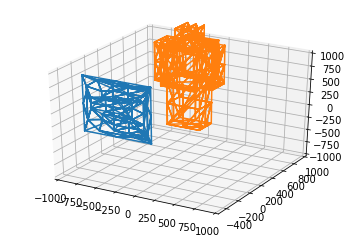

In [33]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z, zdir='z')
ax.plot(x1, y1, z1, zdir='z')

ax.legend()
ax.set_xlim3d(-1000, 1000)
ax.set_ylim3d(-500, 1000)
ax.set_zlim3d(-1000, 1000)

plt.show()

In [4]:
# Geometric Functions

def midpt_triangle(s): # returns centre of polygon
    return [x/3 for x in (sum(i) for i in zip(*s))]

def midpt_twopts(a,b):
    return [(x + y)/2 for x, y in zip(a, b)]

def vector_vertices(a,b): # returns vector of edge connecting 2 vertices
    return [b[0] - a[0], b[1] - a[1], b[2] - a[2]]

def mag_vector(x): # returns magnitude of vector
    return np.sqrt(np.sum(np.square(x)))

def area_triangle(s): # returns area of triangle
    b = mag_vector(vector_vertices(s[0],s[1]))
    mpt = midpt_twopts(s[0],s[1])
    h = mag_vector(vector_vertices(s[2],mpt))
    return 0.5*b*h

def normal_vector(s): # returns vector normal to surface defined by 3 points
    ab = vector_vertices(s[0],s[1])
    bc = vector_vertices(s[1],s[2])
    return [ab[1]*bc[2]-ab[2]*bc[1],ab[0]*bc[2]-ab[2]*bc[0],ab[0]*bc[1]-ab[1]*bc[0]]

def angle_incident(vector1,vector2): #returns angle between 2 vectors
    return np.arccos(sum([a*b for a,b in zip(vector1,vector2)])/(mag_vector(vector1)* mag_vector(vector2)))

def form_factor(A1,A2,theta1,theta2,r): # returns form factor of surface 2 wrt surface 1
    return np.cos(theta1)*np.cos(theta2)*A1*A2/(3.14*np.square(r))

In [5]:
#  define empty lists to populate with calculation parameters/outputs
f = []
theta1_arch = []
theta2_arch = []
R_arch = []
Rmag_arch =[]

In [6]:
#  form factor calculation

for s1 in subsurfaces1:
    for s2 in subsurfaces2:
        R = vector_vertices(midpt_triangle(s1), midpt_triangle(s2))
        Rmag = mag_vector(R)
        theta1 = angle_incident(R, normal_vector(s1))
        theta2 = angle_incident(R, normal_vector(s2))
        f.append(form_factor(area_triangle(s1),area_triangle(s2),theta1,theta2,Rmag))
        R_arch.append(R)
        Rmag_arch.append(Rmag)
        theta1_arch.append(theta1)
        theta2_arch.append(theta2)

In [7]:
# Calculate area of primary polygon
A1 = 0
for item in subsurfaces1: A1 = A1 + area_triangle(item)

# Calculate form factor
result = (sum(f))/A1
print("The distance vectors are ", R_arch)
print("The distances are ", Rmag_arch)
print("The theta1s are ", theta1_arch)
print("The theta2s are ", theta2_arch)
print("The final view factor is ", result)

The distance vectors are  [[169.33813730875667, 1066.6666666666667, -710.4235026041667], [569.3381373087567, 1066.6666666666667, -443.7568359375], [436.00480397542333, 1066.6666666666667, -977.0901692708334], [302.67147064209, 1000.0, -443.7568359375], [436.00480397542333, 1200.0, -710.4235026041667], [169.33813730875667, 933.3333333333334, 56.243164062499886], [569.3381373087567, 933.3333333333334, 289.57649739583337], [436.00480397542333, 933.3333333333334, -177.09016927083337], [302.67147064209, 900.0, 289.57649739583337], [436.00480397542333, 1300.0, 56.243164062499886], [669.3381373087567, 1066.6666666666667, -177.09016927083337], [719.3381373087567, 1066.6666666666667, 289.57649739583337], [619.3381373087567, 1000.0, 289.57649739583337], [669.3381373087567, 1200.0, 56.243164062499886], [569.3381373087567, 1233.3333333333333, 289.57649739583337], [19.33813730875667, 1066.6666666666667, 56.243164062499886], [119.33813730875667, 1066.6666666666667, -177.09016927083337], [69.33813730

In [8]:
# Gebhart Factor Calculation
# Body 1 is sandprint; Body 2 is human body
E1 = 0.90 # emissivity of sand
E2 = 0.98 # emissivity of human body
A2 = 0
for item in subsurfaces2: A2 = A2 + area_triangle(item)
A1 = A1/1000000
A2 = A2/1000000
FF12 = result
B12 = FF12*E2*A2/(1-(FF12**2)*A1*(1-E1)*(1-E2))

In [9]:
# heat transfer and material constants
sigma = 5.67*10**-8  # stefan-boltzmann constant [W/m2/K4]
hc = 10.45 # convective heat transfer coefficient of air [W/m2/K]
c2 = 3500 # heat capacitance of human body [J/kg/K]
ca = 1005 # capacitance of air [J/kg/K]
m2 = 65 # weight of human [kg]
va = 5*5*5 # volume of air [m3]
rhoa = 1.29 # density of air [kg/m3]
ma = va*rhoa # weight of air [kg]

In [10]:
# initialize variables
i = 0
T1 = 273 + 45 # temperature of sandprint [K]
T2 = 273 + 34 # temperature of human surface [K]
Ta = 273 + 20 # temperature of air [K]

In [11]:
# empty lists to store timeseries
q12rarch = []
qa1carch = []
qa2carch = []
q2arch = []
qaarch = []
T1arch = []
T2arch = []
Taarch = []
iarch = []

In [12]:
# run RC model
while i < 7200:
    q12r = E1*A1*B12*sigma*(T1**4-T2**4)
    qa2c = hc*A2*(T2-Ta)
    qa1c = hc*A1*(T1-Ta)
    q2 = q12r - qa2c
    qa = qa1c + qa2c
    T2 = q2/(m2*c2) + T2
    Ta = qa/(ma*ca) + Ta
    q12rarch.append(q12r)
    qa1carch.append(qa1c)
    qa2carch.append(qa2c)
    q2arch.append(q2)
    qaarch.append(qa)
    T1arch.append(T1)
    T2arch.append(T2)
    Taarch.append(Ta)
    iarch.append(i)
    i = i + 1

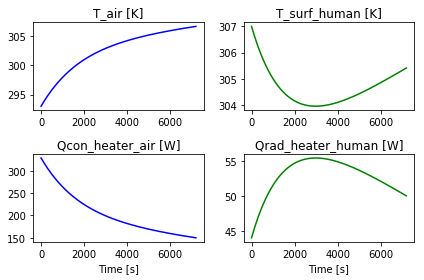

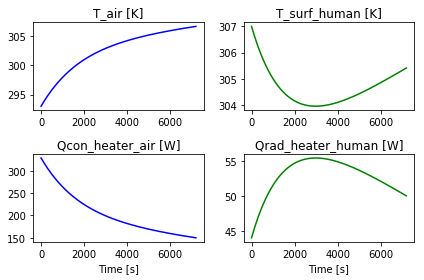

In [16]:
# plots
plt.figure(1)

fig, axes = plt.subplots(nrows=2, ncols=2)

plt.subplot(221)
plt.plot(iarch,Taarch,'b-')
plt.title('T_air [K]')

plt.subplot(222)
plt.plot(iarch,T2arch,'g-')
plt.title('T_surf_human [K]')

plt.subplot(223)
plt.plot(iarch,qa1carch,'b-')
plt.title('Qcon_heater_air [W]')
plt.xlabel('Time [s]')

plt.subplot(224)
plt.plot(iarch,q12rarch,'g-')
plt.title('Qrad_heater_human [W]')
plt.xlabel('Time [s]')

fig.tight_layout()
plt.show()